In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [71]:
df = pd.read_csv('data/SPX_25yr_data.csv')
changes_df = pd.DataFrame(df['Date'][1:])
pct_change = [100 * (df['Adj Close'][i+1] / df['Adj Close'][i] - 1) for i in range(df['Adj Close'].size - 1)]
changes_df.insert(1, column='Pct Change', value=pct_change)

In [72]:
from datetime import datetime
import ephem

In [82]:
moon = ephem.Moon()
moon_illumination = []
for day in changes_df['Date']:
    moon.compute(datetime.fromisoformat(day))
    moon_illumination.append(moon.phase)

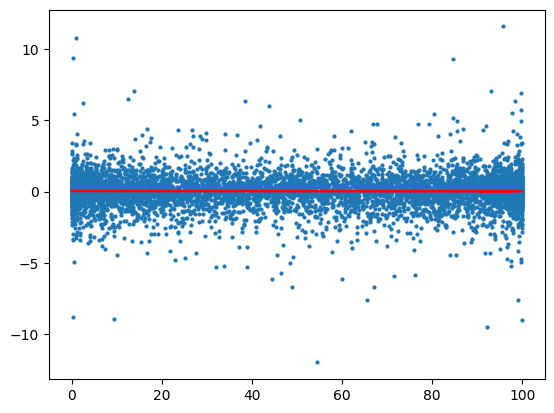

In [90]:
moon_brightness_df = changes_df.copy()
moon_brightness_df.insert(2, column='Moon Brightness %', value=moon_illumination)

x = np.array(moon_brightness_df['Moon Brightness %'])
y = np.array(moon_brightness_df['Pct Change'])
m, c, r, p, *_ = stats.linregress(x, y)
plt.plot(x, m*x + c, color='r')
plt.scatter(x, y, s=4)

In [77]:
moon_illumination_2 = []
for day in changes_df['Date']:
    days_from_full = datetime.fromisoformat(day) - ephem.previous_full_moon(day).datetime()
    moon_illumination_2.append(days_from_full.days)

In [78]:
changes_df_2 = changes_df.copy()
changes_df_2.insert(2, column='Days since full moon', value=moon_illumination_2)

In [79]:
averages = []
for i in range(30):
    moon_phase_info = changes_df_2[changes_df_2['Days since full moon'] == i]['Pct Change']
    avg = sum(moon_phase_info) / moon_phase_info.size
    averages.append(avg)

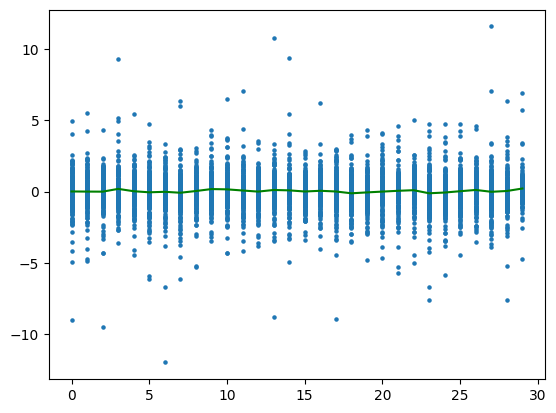

In [80]:
plt.scatter(x=moon_illumination_2, y=changes_df['Pct Change'], s=5)
plt.plot(averages, c='g')

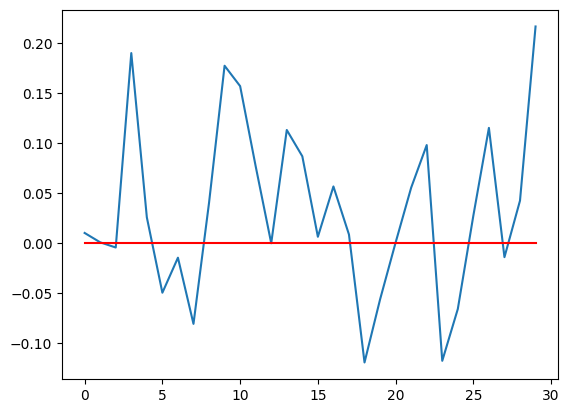

In [81]:
plt.plot(averages)
plt.plot([0 for i in range(30)], c='r')